[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Computational_Statistics/blob/main/4/W4ALE1.ipynb)


In [85]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import pickle
import random
import math
import statsmodels.api as sm



## Standard Normal Random Variate Generation
## In the lecture we stated the following fact:
If $U, V \sim U(0,1)$, and if
$Z_1 = \sqrt{-2 \log U} \cos(2\pi V)$ and
$Z_2 = \sqrt{-2 \log U} \sin(2\pi V)$,
then
$
Z_1, Z_2 \sim N(0,1) \text{ independent. }
$
You will now implement this fact.
# Below implement function, $Normal(n:int)-> tuple$ with an argument $n$, and returning a tuple of lists where the first list comes from $Z_1$ and the second from $Z_2$.
For instance:
$Normal(3) = ([1.2, 0.2, 2.3], [0.1, -2.1, 1.1])$.

In [86]:

def Normal(n: int) -> tuple:
    u = np.random.uniform(0,1, size = n)
    v = np.random.uniform(0,1, size = n)


    z1 = np.sqrt(-2 * np.log(u)) * np.cos(2 * np.pi * v)
    z2 = np.sqrt(-2 * np.log(u)) * np.sin(2 * np.pi * v)


    return (z1, z2)


In [87]:
Normal(5)

(array([ 0.73641912,  0.56014108, -1.02669674,  0.58818065, -0.50560036]),
 array([-0.52683274,  1.18104563, -0.99039697, -0.54338978, -1.32926039]))

# Some unit test (Graded Cell):
Below we use two tests:

1) [Shapiro test for normality](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#scipy.stats.shapiro),

2) [Pearson correlation coefficient test for linear correlation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr),
In the case you wonder how I design unit tests.

In [88]:
# Graded Cell A1, Do not change anything below:
np.random.seed(1) ### fix seed to produce the same results always
N = 1000
assert isinstance(Normal(10), tuple), "Make sure that your function returns a tuple!!!"
z1, z2 = Normal(N)
assert len(z1) == N, f"You gotta come up with exactly {N} samples while yours is {len(z1)}!!!!, Please give attention to shape of the outputs!!!!"
assert scipy.stats.shapiro(z1).pvalue > 0.10 and scipy.stats.shapiro(z2).pvalue > 0.10, "Your numbers do not seem to normal check your implementation!!!"
assert scipy.stats.pearsonr(z1, z2)[1] > 0.25, "Your z1 and z2 seem to be pretty correlated, check your implementation!!!"
print("You doing great pal!!!! Jump to the next exercise!")

You doing great pal!!!! Jump to the next exercise!


### UnGraded Cell A2
# Plot the histogram of your sample and sketch its QQ plot to see if your are doing good.

<function matplotlib.pyplot.show(close=None, block=None)>

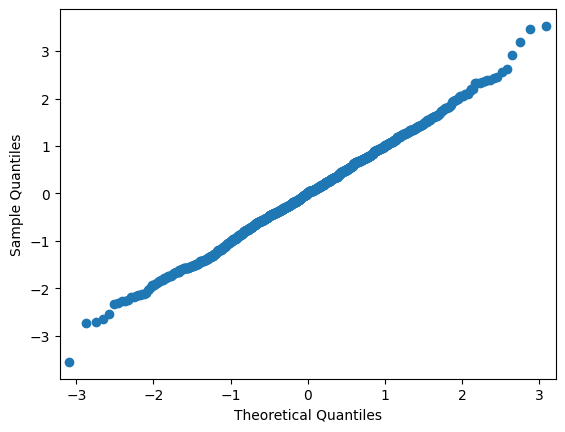

In [89]:
import matplotlib.pyplot as plt

l1,l2=Normal(1000)

fig=sm.qqplot(l1)
plt.show

## You will now implement a snippet giving sample from the mixture of the following three random variables


1.   $N(-3,1)$ (Normal distribution with $\mu = -3, \sigma = 1$)
2.   $U(-2,2)$ (Uniform distribution on $(-2,2)$)
3.   $N(3,1)$ (Normal distribution with $\mu = 3, \sigma = 1$)

# with respect to given probability weights w (do not change the order of distributions). Your function should return a sample from the mixture of these random variables. Please mind the arguments of uniform distribution in scipy.stats.uniform functions.


In [90]:
def f(sample_size: int, w: np.ndarray) -> np.ndarray:
    samples = np.zeros(sample_size)

    for i in range(sample_size):
        rand_num = np.random.rand()
        if rand_num < w[0]:
            sample = np.random.normal(loc=-3, scale=1)
        elif rand_num < w[0] + w[1]:
            sample = np.random.uniform(-2, 2)
        else:
            sample = np.random.normal(loc=3, scale=1)

        samples[i] = sample

    return samples

In [91]:
#### Graded Cell A32, Please do not change anything below as this may cause compiler to crash.
np.random.seed(10)
assert isinstance(f(1000, w = np.array([0.1, 0.2, 0.7])), np.ndarray), "Your function should return a numpy array!!!"
assert len(f(1000, w = np.array([0.1, 0.2, 0.7]))) == 1000, "Your function should return an array of length sample_size!!!"
tester = np.mean(f(100000, w = [0.3, 0.4, 0.3]))
assert np.isclose(tester, 0, atol = 0.01), "Check your implementation mate!!!"
tester = np.mean(f(100000, w = [0.2, 0.2, 0.6]))
assert np.isclose(tester, 1.19, atol = 0.1), "Check your implementation mate!!!"
print("Good job pal!!! All tests passed!!! Big Linkedin Congrats to you!!!")

Good job pal!!! All tests passed!!! Big Linkedin Congrats to you!!!


### UnGraded Cell
### Plot a histogram of the mixture with respect to a given weight.

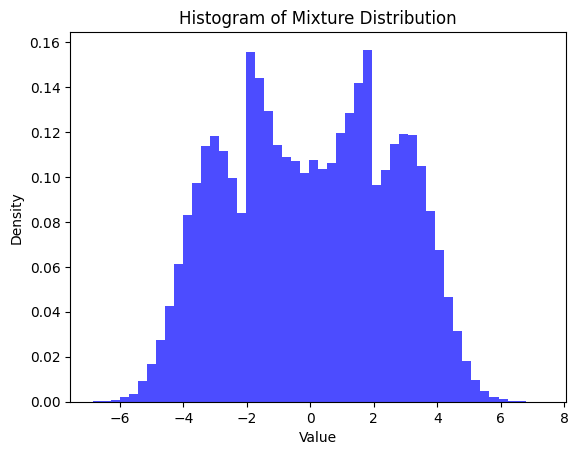

In [92]:
sample = f(100000, w = [0.3, 0.4, 0.3])
plt.hist(sample, bins=50, density=True, color='blue', alpha=0.7)
plt.title('Histogram of Mixture Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()